In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]
#由评论组成的列表，每条评论又是单词索引组成的列表。

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
train_labels[1]

0

In [5]:
train_labels[3]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
#word_index是一个将单词映射为整数索引的字典
#本来键值是单词，值是索引
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
#键值颠倒，将整数索引映射为单词
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#将评论解码，注意索引减去了3，因为0、1、2是为了“padding”、“start of sequence”
#“unknown”分别保留的索引

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
        #将result[i]的指定索引设为1
        #形成独热矩阵
    return results



In [10]:
x_train = vectorize_sequences(train_data)
#将训练数据向量化
x_test = vectorize_sequences(test_data)
#将测试数据向量化

In [11]:
y_train = np.asarray(train_labels).astype('float32')
#将列表转换为向量，并且转换后的数据类型为浮点数。
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#全连接层（Dense）
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#两个中间层，分别有16个隐藏单元，最后输出层，输出一个概率值


In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [25]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]


In [27]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs =20,
                   batch_size=512,
                   validation_data=(x_val, y_val))





Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 17s 1ms/step - loss: 0.5352 - acc: 0.7770 - val_loss: 0.3933 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.3174 - acc: 0.8980 - val_loss: 0.3240 - val_acc: 0.8749
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2337 - acc: 0.9241 - val_loss: 0.2851 - val_acc: 0.8865
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1842 - acc: 0.9398 - val_loss: 0.2743 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1530 - acc: 0.9502 - val_loss: 0.2990 - val_acc: 0.8816
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1238 - acc: 0.9612 - val_loss: 0.2873 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1085 - acc: 0.9655 - val_loss: 0.

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)


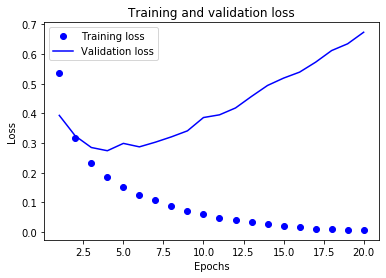

In [36]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#'bo'表示蓝色圆点，‘b’表示蓝色实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

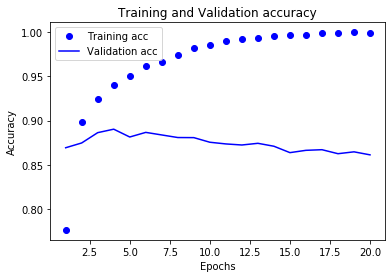

In [37]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.4750 - acc: 0.8217 3s - loss: 
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2651 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1983 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 56s 2ms/step


[0.32262954065322874, 0.87308]

In [43]:
model.predict(x_test)

array([[0.13865972],
       [0.99968934],
       [0.3052749 ],
       ...,
       [0.07326409],
       [0.04391465],
       [0.46946445]], dtype=float32)

In [44]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4939 - acc: 0.7956
Epoch 2/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.2549 - acc: 0.9082
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1859 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 17s 695us/step


[0.3073200649595261, 0.88068]

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/10
25000/25000 [==============================] - 6s 226us/step - loss: 0.5312 - acc: 0.7402
Epoch 2/10
25000/25000 [==============================] - 3s 117us/step - loss: 0.2348 - acc: 0.9138
Epoch 3/10
25000/25000 [==============================] - 3s 102us/step - loss: 0.1554 - acc: 0.9464
Epoch 4/10
25000/25000 [==============================] - 3s 100us/step - loss: 0.1119 - acc: 0.9641 
Epoch 5/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0766 - acc: 0.9770
Epoch 6/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.0481 - acc: 0.9887: 1s - loss: 
Epoch 7/10
25000/25000 [==============================] - 2s 98us/step - loss: 0.0308 - acc: 0.9935
Epoch 8/10
25000/25000 [==============================] - 2s 93us/step - loss: 0.0199 - acc: 0.9963
Epoch 9/10
25000/25000 [==============================] - 2s 97us/step - loss: 0.0135 - acc: 0.9977
Epoch 10/10
25000/25000 [==============================] - 9s 370us/step


[0.8917797034928202, 0.8512]